In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.2.4
1.14.0


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 

 


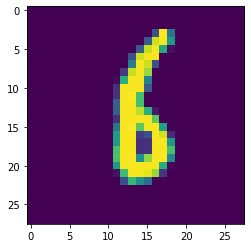

1.0 0.0 float32
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6


In [4]:
index = 1100
plt.imshow(X_train[index,0, :,:])
plt.show()

print(np.max(X_train[index,0, :,:]), np.min(X_train[index,0, :,:]), np.dtype(np.max(X_train[index,0, :,:])))
print(Y_train[index])
print(np.argmax(Y_train[index]))



In [5]:
input_image = Input(shape=(1, 28, 28))
conv1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', data_format='channels_first')(input_image)
conv2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', data_format='channels_first')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2), data_format='channels_first')(conv2)
flatten = Flatten()(pool1)
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(10, activation='softmax')(dense1)
model = Model(inputs=input_image, outputs=dense2)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 28, 28)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [7]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train, validation_split=0.25, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\i00435064\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 60s 1ms/step - loss: 0.1378 - acc: 0.9574 - val_loss: 0.0626 - val_acc: 0.9811
Epoch 2/10
45000/45000 [==============================] - 57s 1ms/step - loss: 0.0425 - acc: 0.9868 - val_loss: 0.0511 - val_acc: 0.9839
Epoch 3/10
45000/45000 [==============================] - 58s 1ms/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0511 - val_acc: 0.9839
Epoch 4/10
45000/45000 [==============================] - 57s 1ms/step - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0564 - val_acc: 0.9861
Epoch 5/10
45000/45000 [==============================] - 55s 1ms/step - loss: 0.0138 - acc: 0.9952 - val_loss: 0.0691 - val_acc: 0.9829
Epoch 6/10
45000/45000 [==============================] - 55s 1ms/step - loss: 0.0092 - acc: 0.9970 - val_loss: 0.0514 - val_acc: 0.9883
Epoch 7/10
45000/45000 [==============================] - 63s 1ms/step - loss: 0.0078 - acc: 0.9973 - val_loss: 0.0567 - val_acc

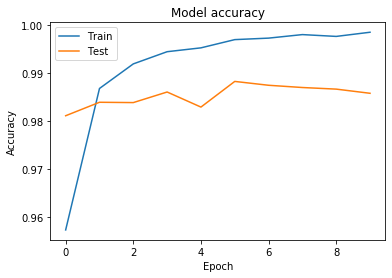

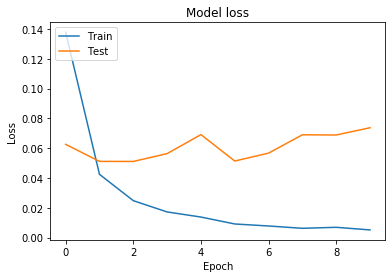

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.045890481647268236, 0.9888]
